In [86]:
import pandas as pd

yanapaybd=pd.read_excel("AvanceDetalladoDelBonoYanapay.xlsx",3)
yanapaybd.columns

Index(['BD', 'UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'GENERO',
       'MODALIDAD_FINAL', 'IDMODALIDAD', 'MODALIDAD_MOSTRAR', 'AREA',
       'PROGRAMADO', 'EJECUTADO', 'GRUPO', 'FECHA_ACTUALIZACION'],
      dtype='object')

In [107]:
yanapayDis=yanapaybd.groupby(['UBIGEO', 'DEPARTAMENTO', 'PROVINCIA','DISTRITO']).agg({'PROGRAMADO': 'sum','EJECUTADO':'sum'})
yanapayDis

,,,,PROGRAMADO,EJECUTADO
UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,,
10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,12656,12126
10102,AMAZONAS,CHACHAPOYAS,ASUNCION,181,176
10103,AMAZONAS,CHACHAPOYAS,BALSAS,848,790
10104,AMAZONAS,CHACHAPOYAS,CHETO,505,490
10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,513,486
...,...,...,...,...,...
250302,UCAYALI,PADRE ABAD,IRAZOLA,7881,6822
250303,UCAYALI,PADRE ABAD,CURIMANA,6258,5567
250304,UCAYALI,PADRE ABAD,NESHUYA,4057,3731


In [110]:
yanapayDis.reset_index(inplace=True)
yanapayDis

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,PROGRAMADO,EJECUTADO
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,12656,12126
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,181,176
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS,848,790
3,10104,AMAZONAS,CHACHAPOYAS,CHETO,505,490
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,513,486
...,...,...,...,...,...,...
1869,250302,UCAYALI,PADRE ABAD,IRAZOLA,7881,6822
1870,250303,UCAYALI,PADRE ABAD,CURIMANA,6258,5567
1871,250304,UCAYALI,PADRE ABAD,NESHUYA,4057,3731
1872,250305,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,3396,3017


In [111]:
yanapayDis.to_csv("yanapayDis.csv",index=False)

In [95]:
congre=pd.read_csv("Congresal_total_eg2021.csv",sep=';')

In [147]:
congre.DESCRIP_ESTADO_ACTA.value_counts()

CONTABILIZADA             1478689
COMPUTADA RESUELTA         324547
ANULADA                     46043
SIN INSTALAR                10478
ACTA RESUELTA                 780
ACTA ANULADA                  667
ANULADA POR EXTRAVIADA        192
Name: DESCRIP_ESTADO_ACTA, dtype: int64

In [151]:
congre=congre[congre.DESCRIP_ESTADO_ACTA.isin(['CONTABILIZADA','COMPUTADA RESUELTA','ACTA RESUELTA'])]

In [ ]:
len(set(congre.DEPARTAMENTO )& set(yanapayDis.DEPARTAMENTO))

In [152]:
congreDis=congre[congre.DEPARTAMENTO.isin(yanapayDis.DEPARTAMENTO)]
congreDis.reset_index(inplace=True)
congreDis.columns

Index(['index', 'UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
       'TIPO_ELECCION', 'MESA_DE_VOTACION', 'DESCRIP_ESTADO_ACTA',
       'TIPO_OBSERVACION', 'UBICACION_EN_CEDULA', 'CODIGO_OP',
       'DESCRIPCION_OP', 'N_TOTAL_VOTOS', 'N_VOTOS_1', 'N_VOTOS_2',
       'N_VOTOS_3', 'N_VOTOS_4', 'N_VOTOS_5', 'N_VOTOS_6', 'N_VOTOS_7',
       'N_VOTOS_8', 'N_VOTOS_9', 'N_VOTOS_10', 'N_VOTOS_11', 'N_VOTOS_12',
       'N_VOTOS_13', 'N_VOTOS_14', 'N_VOTOS_15', 'N_VOTOS_16', 'N_VOTOS_17',
       'N_VOTOS_18', 'N_VOTOS_19', 'N_VOTOS_20', 'N_VOTOS_21', 'N_VOTOS_22',
       'N_VOTOS_23', 'N_VOTOS_24', 'N_VOTOS_25', 'N_VOTOS_26', 'N_VOTOS_27',
       'N_VOTOS_28', 'N_VOTOS_29', 'N_VOTOS_30', 'N_VOTOS_31', 'N_VOTOS_32',
       'N_VOTOS_33', 'N_VOTOS_34', 'N_CVAS', 'N_ELEC_HABIL'],
      dtype='object')

In [156]:
congreDis.DESCRIPCION_OP.value_counts()

FRENTE POPULAR AGRICOLA FIA DEL PERU - FREPAP     81118
FUERZA POPULAR                                    81118
VOTOS IMPUGNADOS                                  81118
VOTOS NULOS                                       81118
VOTOS EN BLANCO                                   81118
ALIANZA PARA EL PROGRESO                          81118
PARTIDO NACIONALISTA PERUANO                      81118
RENOVACION POPULAR                                81118
PODEMOS PERU                                      81118
ACCION POPULAR                                    81118
VICTORIA NACIONAL                                 81118
PARTIDO MORADO                                    81118
PARTIDO DEMOCRATICO SOMOS PERU                    80724
JUNTOS POR EL PERU                                80599
PARTIDO POPULAR CRISTIANO - PPC                   79634
RENACIMIENTO UNIDO NACIONAL                       79096
UNION POR EL PERU                                 77343
DEMOCRACIA DIRECTA                              

In [166]:
unidades=['UBIGEO', 'DEPARTAMENTO', 'PROVINCIA','DISTRITO','DESCRIPCION_OP']
congreDisPartidos=congreDis.groupby(unidades).agg({'N_TOTAL_VOTOS':'sum'})
congreDisPartidos.reset_index(inplace=True)
unidades2=['UBIGEO', 'DEPARTAMENTO', 'PROVINCIA','DISTRITO']
congreDisPartidosL=pd.pivot_table(congreDisPartidos,
                            values=['N_TOTAL_VOTOS'], 
                            index=unidades2,
                            columns=['DESCRIPCION_OP'],
                                 aggfunc=sum)


N_TOTAL_VOTOS  \
DESCRIPCION_OP                              ACCION POPULAR   
UBIGEO DEPARTAMENTO PROVINCIA   DISTRITO                     
10101  AMAZONAS     CHACHAPOYAS CHACHAPOYAS          832.0   
10102  AMAZONAS     CHACHAPOYAS ASUNCION              17.0   
10103  AMAZONAS     CHACHAPOYAS BALSAS                60.0   
10104  AMAZONAS     CHACHAPOYAS CHETO                 38.0   
10105  AMAZONAS     CHACHAPOYAS CHILIQUIN             24.0   
...                                                    ...   
250301 UCAYALI      ATALAYA     RAIMONDI            1302.0   
250302 UCAYALI      ATALAYA     TAHUANIA             324.0   
250303 UCAYALI      ATALAYA     YURUA                 38.0   
250304 UCAYALI      ATALAYA     SEPAHUA              337.0   
250401 UCAYALI      PURUS       PURUS                 35.0   

                                                                      \
DESCRIPCION_OP                              ALIANZA PARA EL PROGRESO   
UBIGEO DEPARTAMENTO PROVINCIA   DISTRITO                               
10101  AMAZONAS     CHACHAPOYAS CHACHAPOYAS                   1336.0   
10102  AMAZONAS     CHACHAPOYAS ASUNCION                         7.0   
10103  AMAZONAS     CHACHAPOYAS BALSAS                          30.0   
10104  AMAZONAS     CHACHAPOYAS CHETO                           26.0   
10105  AMAZONAS     CHACHAPOYAS CHILIQUIN                       15.0   
...                                                              ...   
250301 UCAYALI      ATALAYA     RAIMONDI                       212.0   
250302 UCAYALI      ATALAYA     TAHUANIA                       113.0   
250303 UCAYALI      ATALAYA     YURUA                           55.0   
250304 UCAYALI      ATALAYA     SEPAHUA                        150.0   
250401 UCAYALI      PURUS       PURUS                          391.0   

                                                                                         \
DESCRIPCION_OP                              AVANZA PAIS - PARTIDO DE INTEGRACION SOCIAL   
UBIGEO DEPARTAMENTO PROVINCIA   DISTRITO                                                  
10101  AMAZONAS     CHACHAPOYAS CHACHAPOYAS                                         NaN   
10102  AMAZONAS     CHACHAPOYAS ASUNCION                                            NaN   
10103  AMAZONAS     CHACHAPOYAS BALSAS                                              NaN   
10104  AMAZONAS     CHACHAPOYAS CHETO                                               NaN   
10105  AMAZONAS     CHACHAPOYAS CHILIQUIN                                           NaN   
...                                                                                 ...   
250301 UCAYALI      ATALAYA     RAIMONDI                                            NaN   
250302 UCAYALI      ATALAYA     TAHUANIA                                            NaN   
250303 UCAYALI      ATALAYA     YURUA                                               NaN   
250304 UCAYALI      ATALAYA     SEPAHUA                                             NaN   
250401 UCAYALI      PURUS       PURUS                                               NaN   

                                                                \
DESCRIPCION_OP                              DEMOCRACIA DIRECTA   
UBIGEO DEPARTAMENTO PROVINCIA   DISTRITO                         
10101  AMAZONAS     CHACHAPOYAS CHACHAPOYAS               27.0   
10102  AMAZONAS     CHACHAPOYAS ASUNCION                   0.0   
10103  AMAZONAS     CHACHAPOYAS BALSAS                     0.0   
10104  AMAZONAS     CHACHAPOYAS CHETO                      0.0   
10105  AMAZONAS     CHACHAPOYAS CHILIQUIN                  1.0   
...                                                        ...   
250301 UCAYALI      ATALAYA     RAIMONDI                   NaN   
250302 UCAYALI      ATALAYA     TAHUANIA                   NaN   
250303 UCAYALI      ATALAYA     YURUA                      NaN   
250304 UCAYALI      ATALAYA     SEPAHUA                    NaN   
250401 UCAYALI      PURUS       PU

In [170]:
congreDisPartidosL.columns=[b for a,b in congreDisPartidosL.columns]

,,,,ACCION POPULAR,ALIANZA PARA EL PROGRESO,AVANZA PAIS - PARTIDO DE INTEGRACION SOCIAL,DEMOCRACIA DIRECTA,"EL FRENTE AMPLIO POR JUSTICIA, VIDA Y LIBERTAD",FRENTE POPULAR AGRICOLA FIA DEL PERU - FREPAP,FUERZA POPULAR,JUNTOS POR EL PERU,PARTIDO DEMOCRATICO SOMOS PERU,PARTIDO MORADO,...,PARTIDO POPULAR CRISTIANO - PPC,PERU PATRIA SEGURA,PODEMOS PERU,RENACIMIENTO UNIDO NACIONAL,RENOVACION POPULAR,UNION POR EL PERU,VICTORIA NACIONAL,VOTOS EN BLANCO,VOTOS IMPUGNADOS,VOTOS NULOS
UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,,,,,,,,,,,,,,,,,,,,,
10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,832.0,1336.0,NaN,27.0,391.0,127.0,711.0,1218.0,1289.0,661.0,...,67.0,NaN,398.0,34.0,577.0,97.0,511.0,2149.0,0.0,2169.0
10102,AMAZONAS,CHACHAPOYAS,ASUNCION,17.0,7.0,NaN,0.0,0.0,0.0,6.0,5.0,5.0,2.0,...,0.0,NaN,0.0,1.0,4.0,1.0,3.0,22.0,0.0,20.0
10103,AMAZONAS,CHACHAPOYAS,BALSAS,60.0,30.0,NaN,0.0,5.0,15.0,54.0,25.0,24.0,6.0,...,3.0,NaN,8.0,1.0,19.0,1.0,20.0,88.0,0.0,36.0
10104,AMAZONAS,CHACHAPOYAS,CHETO,38.0,26.0,NaN,0.0,58.0,1.0,19.0,23.0,15.0,8.0,...,3.0,NaN,1.0,0.0,15.0,3.0,7.0,112.0,0.0,48.0
10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,24.0,15.0,NaN,1.0,7.0,0.0,59.0,15.0,13.0,3.0,...,0.0,NaN,3.0,2.0,3.0,3.0,3.0,90.0,0.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250301,UCAYALI,ATALAYA,RAIMONDI,1302.0,212.0,NaN,NaN,NaN,456.0,1470.0,515.0,151.0,50.0,...,2083.0,NaN,133.0,43.0,171.0,110.0,90.0,2638.0,0.0,2779.0
250302,UCAYALI,ATALAYA,TAHUANIA,324.0,113.0,NaN,NaN,NaN,38.0,315.0,250.0,167.0,16.0,...,52.0,NaN,29.0,35.0,28.0,19.0,33.0,789.0,0.0,392.0
250303,UCAYALI,ATALAYA,YURUA,38.0,55.0,NaN,NaN,NaN,0.0,124.0,0.0,5.0,0.0,...,0.0,NaN,0.0,1.0,2.0,0.0,2.0,87.0,0.0,70.0


In [172]:
congreDisPartidosL.reset_index(inplace=True)

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,ACCION POPULAR,ALIANZA PARA EL PROGRESO,AVANZA PAIS - PARTIDO DE INTEGRACION SOCIAL,DEMOCRACIA DIRECTA,"EL FRENTE AMPLIO POR JUSTICIA, VIDA Y LIBERTAD",FRENTE POPULAR AGRICOLA FIA DEL PERU - FREPAP,...,PARTIDO POPULAR CRISTIANO - PPC,PERU PATRIA SEGURA,PODEMOS PERU,RENACIMIENTO UNIDO NACIONAL,RENOVACION POPULAR,UNION POR EL PERU,VICTORIA NACIONAL,VOTOS EN BLANCO,VOTOS IMPUGNADOS,VOTOS NULOS
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,832.0,1336.0,NaN,27.0,391.0,127.0,...,67.0,NaN,398.0,34.0,577.0,97.0,511.0,2149.0,0.0,2169.0
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,17.0,7.0,NaN,0.0,0.0,0.0,...,0.0,NaN,0.0,1.0,4.0,1.0,3.0,22.0,0.0,20.0
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS,60.0,30.0,NaN,0.0,5.0,15.0,...,3.0,NaN,8.0,1.0,19.0,1.0,20.0,88.0,0.0,36.0
3,10104,AMAZONAS,CHACHAPOYAS,CHETO,38.0,26.0,NaN,0.0,58.0,1.0,...,3.0,NaN,1.0,0.0,15.0,3.0,7.0,112.0,0.0,48.0
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,24.0,15.0,NaN,1.0,7.0,0.0,...,0.0,NaN,3.0,2.0,3.0,3.0,3.0,90.0,0.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250301,UCAYALI,ATALAYA,RAIMONDI,1302.0,212.0,NaN,NaN,NaN,456.0,...,2083.0,NaN,133.0,43.0,171.0,110.0,90.0,2638.0,0.0,2779.0
1870,250302,UCAYALI,ATALAYA,TAHUANIA,324.0,113.0,NaN,NaN,NaN,38.0,...,52.0,NaN,29.0,35.0,28.0,19.0,33.0,789.0,0.0,392.0
1871,250303,UCAYALI,ATALAYA,YURUA,38.0,55.0,NaN,NaN,NaN,0.0,...,0.0,NaN,0.0,1.0,2.0,0.0,2.0,87.0,0.0,70.0
1872,250304,UCAYALI,ATALAYA,SEPAHUA,337.0,150.0,NaN,NaN,NaN,288.0,...,50.0,NaN,52.0,5.0,19.0,12.0,48.0,587.0,0.0,301.0


In [179]:
congreDisPartidosL["TotalEmitido"]=congreDisPartidosL.iloc[:,4::].sum(axis=1)

In [183]:
selection3=['UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO','PARTIDO POLITICO NACIONAL PERU LIBRE','TotalEmitido']
congreDisPeruLibre=congreDisPartidosL.loc[:,selection3]
congreDisPeruLibre

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,PARTIDO POLITICO NACIONAL PERU LIBRE,TotalEmitido
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,718.0,13427.0
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,5.0,114.0
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS,97.0,504.0
3,10104,AMAZONAS,CHACHAPOYAS,CHETO,19.0,411.0
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,18.0,324.0
...,...,...,...,...,...,...
1869,250301,UCAYALI,ATALAYA,RAIMONDI,678.0,12972.0
1870,250302,UCAYALI,ATALAYA,TAHUANIA,293.0,2967.0
1871,250303,UCAYALI,ATALAYA,YURUA,8.0,393.0
1872,250304,UCAYALI,ATALAYA,SEPAHUA,107.0,2657.0


In [189]:
congreDisPeruLibre['proporcion']=congreDisPeruLibre.iloc[:,4]/congreDisPeruLibre.iloc[:,5]

In [197]:
congreDisPeruLibre.to_csv('congreDisPeruLibre.csv',index=False)

In [233]:
theKeys=['DEPARTAMENTO', 'PROVINCIA', 'DISTRITO']
yanapayDis.merge(congreDisPeruLibre,on=theKeys)

,UBIGEO_x,DEPARTAMENTO,PROVINCIA,DISTRITO,PROGRAMADO,EJECUTADO,UBIGEO_y,PARTIDO POLITICO NACIONAL PERU LIBRE,TotalEmitido,proporcion
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,12656,12126,10101,718.0,13427.0,0.053474
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,181,176,10102,5.0,114.0,0.043860
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS,848,790,10103,97.0,504.0,0.192460
3,10104,AMAZONAS,CHACHAPOYAS,CHETO,505,490,10104,19.0,411.0,0.046229
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,513,486,10105,18.0,324.0,0.055556
...,...,...,...,...,...,...,...,...,...,...
1854,250302,UCAYALI,PADRE ABAD,IRAZOLA,7881,6822,250202,1149.0,6535.0,0.175822
1855,250303,UCAYALI,PADRE ABAD,CURIMANA,6258,5567,250203,896.0,4142.0,0.216321
1856,250304,UCAYALI,PADRE ABAD,NESHUYA,4057,3731,250204,526.0,3854.0,0.136482
1857,250305,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,3396,3017,250205,457.0,2670.0,0.171161


In [239]:
set(yanapayDis.PROVINCIA)^set(congreDisPeruLibre.PROVINCIA)

set()

In [231]:
yanapayDis['PROVINCIA']=yanapayDis.PROVINCIA.str.replace(pat='ANTONIO RAYMONDI',repl='ANTONIO RAIMONDI',regex=False)

In [240]:
InYANAnotCONGRE=list(set(yanapayDis.DISTRITO)-set(congreDisPeruLibre.DISTRITO))
InYANAnotCONGRE

['HUAYLLAY GRANDE',
 'MILPUC',
 'RAYMONDI',
 'CASPISAPA',
 'GAMARRA',
 'SAN JUAN DE ISCOS',
 'SANTA RITA DE SIGUAS',
 'ESTIQUE-PAMPA',
 'HUAYA',
 'TOMAY KICHWA',
 'CAPAZO',
 'SANTA CRUZ DE TOLEDO',
 'CARMEN DE LA LEGUA REYNOSO',
 'QUISQUI (KICHKI)',
 'RINCONADA LLICUAR']

In [241]:
InCONGREnotYANA=list(set(congreDisPeruLibre.DISTRITO)-set(yanapayDis.DISTRITO))
InCONGREnotYANA

['HUALLA',
 'CARMEN DE LA LEGUA-REYNOSO',
 'CASPIZAPA',
 'SANTA CRUZ DE TOLED',
 'ESTIQUE PAMPA',
 'MILPUCC',
 'HUALLAY-GRANDE',
 'RAIMONDI',
 'QUISQUI',
 'CAPASO',
 'TOMAY-KICHWA',
 'SAN JUAN DE YSCOS',
 'SANTA RITA DE SIHUAS',
 'MARISCAL GAMARRA',
 'RINCONADA-LLICUAR']

In [246]:
congreDisPeruLibre[congreDisPeruLibre.DISTRITO.str.contains("CAPASO")]

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,PARTIDO POLITICO NACIONAL PERU LIBRE,TotalEmitido,proporcion
1726,201204,PUNO,EL COLLAO,CAPASO,121.0,483.0,0.250518


In [247]:
from thefuzz import process

[(dis, process.extractOne(dis, InCONGREnotYANA)) for dis in sorted(InYANAnotCONGRE)]

[('CAPAZO', ('CAPASO', 83)),
 ('CARMEN DE LA LEGUA REYNOSO', ('CARMEN DE LA LEGUA-REYNOSO', 100)),
 ('CASPISAPA', ('CASPIZAPA', 89)),
 ('ESTIQUE-PAMPA', ('ESTIQUE PAMPA', 100)),
 ('GAMARRA', ('MARISCAL GAMARRA', 90)),
 ('HUAYA', ('HUALLA', 73)),
 ('HUAYLLAY GRANDE', ('HUALLAY-GRANDE', 97)),
 ('MILPUC', ('MILPUCC', 92)),
 ('QUISQUI (KICHKI)', ('QUISQUI', 90)),
 ('RAYMONDI', ('RAIMONDI', 88)),
 ('RINCONADA LLICUAR', ('RINCONADA-LLICUAR', 100)),
 ('SAN JUAN DE ISCOS', ('SAN JUAN DE YSCOS', 94)),
 ('SANTA CRUZ DE TOLEDO', ('SANTA CRUZ DE TOLED', 97)),
 ('SANTA RITA DE SIGUAS', ('SANTA RITA DE SIHUAS', 95)),
 ('TOMAY KICHWA', ('TOMAY-KICHWA', 100))]

In [248]:
changesYana={dis: process.extractOne(dis,InCONGREnotYANA)[0] for dis in sorted(InYANAnotCONGRE)}
changesYana

{'CAPAZO': 'CAPASO',
 'CARMEN DE LA LEGUA REYNOSO': 'CARMEN DE LA LEGUA-REYNOSO',
 'CASPISAPA': 'CASPIZAPA',
 'ESTIQUE-PAMPA': 'ESTIQUE PAMPA',
 'GAMARRA': 'MARISCAL GAMARRA',
 'HUAYA': 'HUALLA',
 'HUAYLLAY GRANDE': 'HUALLAY-GRANDE',
 'MILPUC': 'MILPUCC',
 'QUISQUI (KICHKI)': 'QUISQUI',
 'RAYMONDI': 'RAIMONDI',
 'RINCONADA LLICUAR': 'RINCONADA-LLICUAR',
 'SAN JUAN DE ISCOS': 'SAN JUAN DE YSCOS',
 'SANTA CRUZ DE TOLEDO': 'SANTA CRUZ DE TOLED',
 'SANTA RITA DE SIGUAS': 'SANTA RITA DE SIHUAS',
 'TOMAY KICHWA': 'TOMAY-KICHWA'}

In [249]:
yanapayDis.DISTRITO.replace(changesYana,inplace=True)

In [253]:
CongreYanay=yanapayDis.merge(congreDisPeruLibre,on=theKeys)
CongreYanay

,UBIGEO_x,DEPARTAMENTO,PROVINCIA,DISTRITO,PROGRAMADO,EJECUTADO,UBIGEO_y,PARTIDO POLITICO NACIONAL PERU LIBRE,TotalEmitido,proporcion
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,12656,12126,10101,718.0,13427.0,0.053474
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,181,176,10102,5.0,114.0,0.043860
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS,848,790,10103,97.0,504.0,0.192460
3,10104,AMAZONAS,CHACHAPOYAS,CHETO,505,490,10104,19.0,411.0,0.046229
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,513,486,10105,18.0,324.0,0.055556
...,...,...,...,...,...,...,...,...,...,...
1869,250302,UCAYALI,PADRE ABAD,IRAZOLA,7881,6822,250202,1149.0,6535.0,0.175822
1870,250303,UCAYALI,PADRE ABAD,CURIMANA,6258,5567,250203,896.0,4142.0,0.216321
1871,250304,UCAYALI,PADRE ABAD,NESHUYA,4057,3731,250204,526.0,3854.0,0.136482
1872,250305,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,3396,3017,250205,457.0,2670.0,0.171161


In [257]:
CongreYanay['yanaProp']=CongreYanay.EJECUTADO/CongreYanay.PROGRAMADO

<AxesSubplot:xlabel='yanaProp', ylabel='proporcion'>

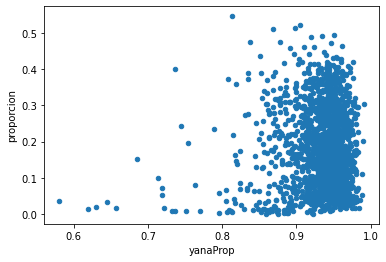

In [261]:
CongreYanay.plot.scatter(x='yanaProp',y='proporcion',)

In [255]:
CongreYanay.to_csv('CongreYanay.csv',index=False)

In [276]:
Presis=pd.read_excel("1ra_vuelta_Version_PCM.xlsx")
Presis.columns

Index(['UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'TIPO_ELECCION',
       'MESA_DE_VOTACION', 'DESCRIP_ESTADO_ACTA', 'TIPO_OBSERVACION', 'N_CVAS',
       'N_ELEC_HABIL', 'VOTOS_P1', 'VOTOS_P2', 'VOTOS_P3', 'VOTOS_P4',
       'VOTOS_P5', 'VOTOS_P6', 'VOTOS_P7', 'VOTOS_P8', 'VOTOS_P9', 'VOTOS_P10',
       'VOTOS_P11', 'VOTOS_P12', 'VOTOS_P13', 'VOTOS_P14', 'VOTOS_P15',
       'VOTOS_P16', 'VOTOS_P17', 'VOTOS_P18', 'VOTOS_VB', 'VOTOS_VN',
       'VOTOS_VI'],
      dtype='object')

In [277]:
Presis['presiEmitidos']=Presis.iloc[:,10:].sum(axis=1)

In [278]:
Presis[Presis.N_CVAS!=Presis.presiEmitidos]

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,TIPO_ELECCION,MESA_DE_VOTACION,DESCRIP_ESTADO_ACTA,TIPO_OBSERVACION,N_CVAS,N_ELEC_HABIL,...,VOTOS_P13,VOTOS_P14,VOTOS_P15,VOTOS_P16,VOTOS_P17,VOTOS_P18,VOTOS_VB,VOTOS_VN,VOTOS_VI,presiEmitidos
19,921001,AMERICA,CHILE,ANTOFAGASTA,PRESIDENCIAL,80614,SIN INSTALAR,NaN,NaN,296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
24,921006,AMERICA,CHILE,SANTIAGO,PRESIDENCIAL,80970,SIN INSTALAR,NaN,NaN,299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
25,921005,AMERICA,CHILE,IQUIQUE,PRESIDENCIAL,80660,SIN INSTALAR,NaN,NaN,297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
26,921006,AMERICA,CHILE,SANTIAGO,PRESIDENCIAL,80720,SIN INSTALAR,NaN,NaN,300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
27,921006,AMERICA,CHILE,SANTIAGO,PRESIDENCIAL,80731,SIN INSTALAR,NaN,NaN,300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85210,921006,AMERICA,CHILE,SANTIAGO,PRESIDENCIAL,80870,SIN INSTALAR,NaN,NaN,300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
85211,921006,AMERICA,CHILE,SANTIAGO,PRESIDENCIAL,80956,SIN INSTALAR,NaN,NaN,299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
85212,921006,AMERICA,CHILE,SANTIAGO,PRESIDENCIAL,80879,SIN INSTALAR,NaN,NaN,300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
85213,921006,AMERICA,CHILE,SANTIAGO,PRESIDENCIAL,80889,SIN INSTALAR,NaN,NaN,300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [279]:
Presis.DESCRIP_ESTADO_ACTA.value_counts()

CONTABILIZADA             81924
COMPUTADA RESUELTA         3081
ANULADA                     949
SIN INSTALAR                499
EN PROCESO                   32
ANULADA POR EXTRAVIADA        3
Name: DESCRIP_ESTADO_ACTA, dtype: int64

In [280]:
Presis=Presis[Presis.DESCRIP_ESTADO_ACTA.isin(['CONTABILIZADA','COMPUTADA RESUELTA','ACTA RESUELTA'])]

In [281]:
Presis

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,TIPO_ELECCION,MESA_DE_VOTACION,DESCRIP_ESTADO_ACTA,TIPO_OBSERVACION,N_CVAS,N_ELEC_HABIL,...,VOTOS_P13,VOTOS_P14,VOTOS_P15,VOTOS_P16,VOTOS_P17,VOTOS_P18,VOTOS_VB,VOTOS_VN,VOTOS_VI,presiEmitidos
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,PRESIDENCIAL,31,CONTABILIZADA,NaN,97.0,300,...,3.0,NaN,1.0,4.0,NaN,3.0,NaN,20.0,NaN,97.0
1,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,PRESIDENCIAL,54,CONTABILIZADA,NaN,204.0,300,...,21.0,1.0,2.0,22.0,NaN,30.0,19.0,15.0,NaN,204.0
2,10204,AMAZONAS,BAGUA,EL PARCO,PRESIDENCIAL,205,CONTABILIZADA,NaN,224.0,300,...,7.0,3.0,1.0,54.0,NaN,15.0,37.0,14.0,NaN,224.0
3,10512,AMAZONAS,RODRIGUEZ DE MENDOZA,VISTA ALEGRE,PRESIDENCIAL,576,CONTABILIZADA,NaN,81.0,247,...,5.0,1.0,1.0,15.0,NaN,NaN,28.0,2.0,NaN,81.0
4,10601,AMAZONAS,CONDORCANQUI,NIEVA,PRESIDENCIAL,585,CONTABILIZADA,NaN,159.0,300,...,4.0,NaN,NaN,28.0,NaN,2.0,27.0,8.0,NaN,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86483,210609,SAN MARTIN,SAN MARTIN,HUIMBAYOC,PRESIDENCIAL,903012,CONTABILIZADA,NaN,158.0,188,...,1.0,1.0,1.0,NaN,NaN,3.0,52.0,12.0,NaN,158.0
86484,250205,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,PRESIDENCIAL,79806,CONTABILIZADA,NaN,175.0,238,...,6.0,1.0,2.0,39.0,NaN,11.0,55.0,5.0,NaN,175.0
86485,250301,UCAYALI,ATALAYA,RAIMONDI,PRESIDENCIAL,79850,CONTABILIZADA,NaN,193.0,300,...,1.0,NaN,NaN,13.0,1.0,3.0,72.0,12.0,NaN,193.0
86486,250302,UCAYALI,ATALAYA,TAHUANIA,PRESIDENCIAL,79907,CONTABILIZADA,NaN,146.0,300,...,1.0,1.0,5.0,20.0,NaN,3.0,37.0,11.0,NaN,146.0


In [282]:
presiDis=Presis[Presis.DEPARTAMENTO.isin(yanapayDis.DEPARTAMENTO)]
presiDis

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,TIPO_ELECCION,MESA_DE_VOTACION,DESCRIP_ESTADO_ACTA,TIPO_OBSERVACION,N_CVAS,N_ELEC_HABIL,...,VOTOS_P13,VOTOS_P14,VOTOS_P15,VOTOS_P16,VOTOS_P17,VOTOS_P18,VOTOS_VB,VOTOS_VN,VOTOS_VI,presiEmitidos
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,PRESIDENCIAL,31,CONTABILIZADA,NaN,97.0,300,...,3.0,NaN,1.0,4.0,NaN,3.0,NaN,20.0,NaN,97.0
1,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,PRESIDENCIAL,54,CONTABILIZADA,NaN,204.0,300,...,21.0,1.0,2.0,22.0,NaN,30.0,19.0,15.0,NaN,204.0
2,10204,AMAZONAS,BAGUA,EL PARCO,PRESIDENCIAL,205,CONTABILIZADA,NaN,224.0,300,...,7.0,3.0,1.0,54.0,NaN,15.0,37.0,14.0,NaN,224.0
3,10512,AMAZONAS,RODRIGUEZ DE MENDOZA,VISTA ALEGRE,PRESIDENCIAL,576,CONTABILIZADA,NaN,81.0,247,...,5.0,1.0,1.0,15.0,NaN,NaN,28.0,2.0,NaN,81.0
4,10601,AMAZONAS,CONDORCANQUI,NIEVA,PRESIDENCIAL,585,CONTABILIZADA,NaN,159.0,300,...,4.0,NaN,NaN,28.0,NaN,2.0,27.0,8.0,NaN,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86483,210609,SAN MARTIN,SAN MARTIN,HUIMBAYOC,PRESIDENCIAL,903012,CONTABILIZADA,NaN,158.0,188,...,1.0,1.0,1.0,NaN,NaN,3.0,52.0,12.0,NaN,158.0
86484,250205,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,PRESIDENCIAL,79806,CONTABILIZADA,NaN,175.0,238,...,6.0,1.0,2.0,39.0,NaN,11.0,55.0,5.0,NaN,175.0
86485,250301,UCAYALI,ATALAYA,RAIMONDI,PRESIDENCIAL,79850,CONTABILIZADA,NaN,193.0,300,...,1.0,NaN,NaN,13.0,1.0,3.0,72.0,12.0,NaN,193.0
86486,250302,UCAYALI,ATALAYA,TAHUANIA,PRESIDENCIAL,79907,CONTABILIZADA,NaN,146.0,300,...,1.0,1.0,5.0,20.0,NaN,3.0,37.0,11.0,NaN,146.0


In [283]:
presiDis.columns

Index(['UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'TIPO_ELECCION',
       'MESA_DE_VOTACION', 'DESCRIP_ESTADO_ACTA', 'TIPO_OBSERVACION', 'N_CVAS',
       'N_ELEC_HABIL', 'VOTOS_P1', 'VOTOS_P2', 'VOTOS_P3', 'VOTOS_P4',
       'VOTOS_P5', 'VOTOS_P6', 'VOTOS_P7', 'VOTOS_P8', 'VOTOS_P9', 'VOTOS_P10',
       'VOTOS_P11', 'VOTOS_P12', 'VOTOS_P13', 'VOTOS_P14', 'VOTOS_P15',
       'VOTOS_P16', 'VOTOS_P17', 'VOTOS_P18', 'VOTOS_VB', 'VOTOS_VN',
       'VOTOS_VI', 'presiEmitidos'],
      dtype='object')

In [286]:
selectPresi=['UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'VOTOS_P16', 'presiEmitidos']
presiDis=presiDis.loc[:,selectPresi]
presiDis

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,VOTOS_P16,presiEmitidos
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,4.0,97.0
1,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,22.0,204.0
2,10204,AMAZONAS,BAGUA,EL PARCO,54.0,224.0
3,10512,AMAZONAS,RODRIGUEZ DE MENDOZA,VISTA ALEGRE,15.0,81.0
4,10601,AMAZONAS,CONDORCANQUI,NIEVA,28.0,159.0
...,...,...,...,...,...,...
86483,210609,SAN MARTIN,SAN MARTIN,HUIMBAYOC,NaN,158.0
86484,250205,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,39.0,175.0
86485,250301,UCAYALI,ATALAYA,RAIMONDI,13.0,193.0
86486,250302,UCAYALI,ATALAYA,TAHUANIA,20.0,146.0


In [292]:
unidades=['UBIGEO', 'DEPARTAMENTO', 'PROVINCIA','DISTRITO']
presiDisPeruLibre=presiDis.groupby(unidades).agg({'presiEmitidos':'sum','VOTOS_P16':'sum'})

In [297]:
presiDisPeruLibre.reset_index(inplace=True)
presiDisPeruLibre

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,presiEmitidos,VOTOS_P16
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,13619.0,1695.0
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,114.0,14.0
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS,504.0,117.0
3,10104,AMAZONAS,CHACHAPOYAS,CHETO,411.0,44.0
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,324.0,41.0
...,...,...,...,...,...,...
1869,250301,UCAYALI,ATALAYA,RAIMONDI,13165.0,1354.0
1870,250302,UCAYALI,ATALAYA,TAHUANIA,2967.0,300.0
1871,250303,UCAYALI,ATALAYA,YURUA,393.0,10.0
1872,250304,UCAYALI,ATALAYA,SEPAHUA,2657.0,162.0


In [310]:
CongrePresiYanay=CongreYanay.merge(presiDisPeruLibre,on=theKeys)
CongrePresiYanay

,UBIGEO_x,DEPARTAMENTO,PROVINCIA,DISTRITO,PROGRAMADO,EJECUTADO,UBIGEO_y,PARTIDO POLITICO NACIONAL PERU LIBRE,TotalEmitido,proporcion,yanaProp,UBIGEO,presiEmitidos,VOTOS_P16
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,12656,12126,10101,718.0,13427.0,0.053474,0.958123,10101,13619.0,1695.0
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,181,176,10102,5.0,114.0,0.043860,0.972376,10102,114.0,14.0
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS,848,790,10103,97.0,504.0,0.192460,0.931604,10103,504.0,117.0
3,10104,AMAZONAS,CHACHAPOYAS,CHETO,505,490,10104,19.0,411.0,0.046229,0.970297,10104,411.0,44.0
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,513,486,10105,18.0,324.0,0.055556,0.947368,10105,324.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250302,UCAYALI,PADRE ABAD,IRAZOLA,7881,6822,250202,1149.0,6535.0,0.175822,0.865626,250202,6333.0,1659.0
1870,250303,UCAYALI,PADRE ABAD,CURIMANA,6258,5567,250203,896.0,4142.0,0.216321,0.889581,250203,4738.0,1223.0
1871,250304,UCAYALI,PADRE ABAD,NESHUYA,4057,3731,250204,526.0,3854.0,0.136482,0.919645,250204,3658.0,624.0
1872,250305,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,3396,3017,250205,457.0,2670.0,0.171161,0.888398,250205,2670.0,595.0


In [305]:
set(presiDisPeruLibre.PROVINCIA) - set(CongreYanay.PROVINCIA)

set()

In [307]:
presiDisPeruLibre.PROVINCIA=presiDisPeruLibre.PROVINCIA.str.replace('øø','Ñ')
presiDisPeruLibre.DISTRITO=presiDisPeruLibre.DISTRITO.str.replace('øø','Ñ')

In [308]:
set(presiDisPeruLibre.DISTRITO) - set(CongreYanay.DISTRITO)

set()

In [319]:
CongrePresiYanay.columns#.to_csv("CongrePresiYanay.csv",index)

Index(['UBIGEO_x', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'PROGRAMADO',
       'EJECUTADO', 'PARTIDO POLITICO NACIONAL PERU LIBRE', 'TotalEmitido',
       'proporcion', 'yanaProp', 'UBIGEO', 'presiEmitidos', 'VOTOS_P16'],
      dtype='object')

In [318]:
CongrePresiYanay[CongrePresiYanay.UBIGEO_y!=CongrePresiYanay.UBIGEO]
CongrePresiYanay.drop(columns='UBIGEO_y',inplace=True)
CongrePresiYanay

,UBIGEO_x,DEPARTAMENTO,PROVINCIA,DISTRITO,PROGRAMADO,EJECUTADO,PARTIDO POLITICO NACIONAL PERU LIBRE,TotalEmitido,proporcion,yanaProp,UBIGEO,presiEmitidos,VOTOS_P16
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,12656,12126,718.0,13427.0,0.053474,0.958123,10101,13619.0,1695.0
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,181,176,5.0,114.0,0.043860,0.972376,10102,114.0,14.0
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS,848,790,97.0,504.0,0.192460,0.931604,10103,504.0,117.0
3,10104,AMAZONAS,CHACHAPOYAS,CHETO,505,490,19.0,411.0,0.046229,0.970297,10104,411.0,44.0
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,513,486,18.0,324.0,0.055556,0.947368,10105,324.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250302,UCAYALI,PADRE ABAD,IRAZOLA,7881,6822,1149.0,6535.0,0.175822,0.865626,250202,6333.0,1659.0
1870,250303,UCAYALI,PADRE ABAD,CURIMANA,6258,5567,896.0,4142.0,0.216321,0.889581,250203,4738.0,1223.0
1871,250304,UCAYALI,PADRE ABAD,NESHUYA,4057,3731,526.0,3854.0,0.136482,0.919645,250204,3658.0,624.0
1872,250305,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,3396,3017,457.0,2670.0,0.171161,0.888398,250205,2670.0,595.0


In [325]:
olds=['UBIGEO_x','PROGRAMADO','EJECUTADO','PARTIDO POLITICO NACIONAL PERU LIBRE','TotalEmitido','proporcion','VOTOS_P16']
news=['UBIGEO_yana','programado_yana','ejecutado_yana','PeruLibre_congre',"congreEmitidos","proporcion_congre",'PeruLibre_presi']
mapChanges={old:new for old,new in zip(olds,news)}
CongrePresiYanay.rename(columns=mapChanges,inplace=True)
CongrePresiYanay

,UBIGEO_yana,DEPARTAMENTO,PROVINCIA,DISTRITO,programado_yana,ejecutado_yana,PeruLibre_congre,congreEmitidos,proporcion_congre,yanaProp,UBIGEO,presiEmitidos,PeruLibre_presi
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,12656,12126,718.0,13427.0,0.053474,0.958123,10101,13619.0,1695.0
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,181,176,5.0,114.0,0.043860,0.972376,10102,114.0,14.0
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS,848,790,97.0,504.0,0.192460,0.931604,10103,504.0,117.0
3,10104,AMAZONAS,CHACHAPOYAS,CHETO,505,490,19.0,411.0,0.046229,0.970297,10104,411.0,44.0
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,513,486,18.0,324.0,0.055556,0.947368,10105,324.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250302,UCAYALI,PADRE ABAD,IRAZOLA,7881,6822,1149.0,6535.0,0.175822,0.865626,250202,6333.0,1659.0
1870,250303,UCAYALI,PADRE ABAD,CURIMANA,6258,5567,896.0,4142.0,0.216321,0.889581,250203,4738.0,1223.0
1871,250304,UCAYALI,PADRE ABAD,NESHUYA,4057,3731,526.0,3854.0,0.136482,0.919645,250204,3658.0,624.0
1872,250305,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,3396,3017,457.0,2670.0,0.171161,0.888398,250205,2670.0,595.0


In [330]:
orderCols=['UBIGEO_yana', 'UBIGEO','DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
       'programado_yana', 'ejecutado_yana','yanaProp', 'PeruLibre_congre',
       'congreEmitidos', 'proporcion_congre', 'PeruLibre_presi','presiEmitidos']
CongrePresiYanay=CongrePresiYanay.loc[:,orderCols]
CongrePresiYanay

,UBIGEO_yana,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,programado_yana,ejecutado_yana,yanaProp,PeruLibre_congre,congreEmitidos,proporcion_congre,PeruLibre_presi,presiEmitidos
0,10101,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,12656,12126,0.958123,718.0,13427.0,0.053474,1695.0,13619.0
1,10102,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,181,176,0.972376,5.0,114.0,0.043860,14.0,114.0
2,10103,10103,AMAZONAS,CHACHAPOYAS,BALSAS,848,790,0.931604,97.0,504.0,0.192460,117.0,504.0
3,10104,10104,AMAZONAS,CHACHAPOYAS,CHETO,505,490,0.970297,19.0,411.0,0.046229,44.0,411.0
4,10105,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,513,486,0.947368,18.0,324.0,0.055556,41.0,324.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250302,250202,UCAYALI,PADRE ABAD,IRAZOLA,7881,6822,0.865626,1149.0,6535.0,0.175822,1659.0,6333.0
1870,250303,250203,UCAYALI,PADRE ABAD,CURIMANA,6258,5567,0.889581,896.0,4142.0,0.216321,1223.0,4738.0
1871,250304,250204,UCAYALI,PADRE ABAD,NESHUYA,4057,3731,0.919645,526.0,3854.0,0.136482,624.0,3658.0
1872,250305,250205,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,3396,3017,0.888398,457.0,2670.0,0.171161,595.0,2670.0


In [332]:
CongrePresiYanay['proporcion_presi']=CongrePresiYanay.PeruLibre_presi/CongrePresiYanay.presiEmitidos
CongrePresiYanay

,UBIGEO_yana,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,programado_yana,ejecutado_yana,yanaProp,PeruLibre_congre,congreEmitidos,proporcion_congre,PeruLibre_presi,presiEmitidos,proporcion_presi
0,10101,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,12656,12126,0.958123,718.0,13427.0,0.053474,1695.0,13619.0,0.124458
1,10102,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,181,176,0.972376,5.0,114.0,0.043860,14.0,114.0,0.122807
2,10103,10103,AMAZONAS,CHACHAPOYAS,BALSAS,848,790,0.931604,97.0,504.0,0.192460,117.0,504.0,0.232143
3,10104,10104,AMAZONAS,CHACHAPOYAS,CHETO,505,490,0.970297,19.0,411.0,0.046229,44.0,411.0,0.107056
4,10105,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,513,486,0.947368,18.0,324.0,0.055556,41.0,324.0,0.126543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250302,250202,UCAYALI,PADRE ABAD,IRAZOLA,7881,6822,0.865626,1149.0,6535.0,0.175822,1659.0,6333.0,0.261961
1870,250303,250203,UCAYALI,PADRE ABAD,CURIMANA,6258,5567,0.889581,896.0,4142.0,0.216321,1223.0,4738.0,0.258126
1871,250304,250204,UCAYALI,PADRE ABAD,NESHUYA,4057,3731,0.919645,526.0,3854.0,0.136482,624.0,3658.0,0.170585
1872,250305,250205,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,3396,3017,0.888398,457.0,2670.0,0.171161,595.0,2670.0,0.222846
